In [1]:
import os
os.environ["KERAS_BACKEND"] = 'jax'
import jax
import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
vocab_size = 10000
num_tags = 100
num_departments = 4

In [4]:
title = keras.Input(shape=(vocab_size,), name="title")
text_body = keras.Input(shape=(vocab_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

In [5]:
full_input = keras.layers.Concatenate()([title, text_body, tags])
features= keras.layers.Dense(64, activation="relu")(full_input)



Platform 'METAL' is experimental and not all JAX functionality may be correctly supported!
W0000 00:00:1732825423.768650 37863912 mps_client.cc:510] WARNING: JAX Apple GPU support is experimental and not all JAX functionality is correctly supported!
I0000 00:00:1732825423.791535 37863912 service.cc:145] XLA service 0x600003c44500 initialized for platform METAL (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732825423.791552 37863912 service.cc:153]   StreamExecutor device (0): Metal, <undefined>
I0000 00:00:1732825423.794768 37863912 mps_client.cc:406] Using Simple allocator.
I0000 00:00:1732825423.794787 37863912 mps_client.cc:384] XLA backend will use up to 28989243392 bytes on device 0 for SimpleAllocator.


Metal device set to: Apple M3 Pro


In [6]:
priority = keras.layers.Dense(1, activation="sigmoid", name="priority")(features)
dept = keras.layers.Dense(num_departments, activation="softmax", name="department")(features)

In [7]:
model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, dept])

In [8]:
n = 1280
title_data = np.random.randint(0, 2, size=(n, vocab_size))
text_body_data = np.random.randint(0, 2, size=(n, vocab_size))
tags_data = np.random.randint(0,2, size=(n, num_tags))


In [9]:
priority_data = np.random.random(size=(n, 1))
department_data = np.random.randint(0, 2, size=(n, num_departments))

In [10]:
model.compile(optimizer="rmsprop", 
            loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"],["accuracy"]])
model.fit([title_data, text_body_data, tags_data], [priority_data, department_data], epochs=1)
              

28/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - department_accuracy: 0.1697 - department_loss: 21.0143 - loss: 21.3211 - priority_loss: 0.3078 - priority_mean_absolute_error: 0.4769

/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[20100,64]), ShapedArray(float32[64]), ShapedArray(float32[64,1]), ShapedArray(float32[1]), ShapedArray(float32[64,4]), ShapedArray(float32[4]), ShapedArray(int32[]), ShapedArray(float32[]), ShapedArray(float32[20100,64]), ShapedArray(float32[64]), ShapedArray(float32[64,1]), ShapedArray(float32[1]), ShapedArray(float32[64,4]), ShapedArray(float32[4]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"
/Users/ethanvizitei/Code/Personal/dlwp/ve

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - department_accuracy: 0.1599 - department_loss: 21.7034 - loss: 22.0182 - priority_loss: 0.3148 - priority_mean_absolute_error: 0.4840


In [11]:
model.evaluate([title_data, text_body_data, tags_data], [priority_data, department_data])

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - department_accuracy: 0.1421 - department_loss: 23.7652 - loss: 24.0873 - priority_loss: 0.3220 - priority_mean_absolute_error: 0.4963


/Users/ethanvizitei/Code/Personal/dlwp/venv/lib/python3.10/site-packages/jax/_src/interpreters/mlir.py:1114: UserWarning: Some donated buffers were not usable: ShapedArray(float32[20100,64]), ShapedArray(float32[64]), ShapedArray(float32[64,1]), ShapedArray(float32[1]), ShapedArray(float32[64,4]), ShapedArray(float32[4]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]), ShapedArray(float32[]).
Donation is not implemented for ('METAL',).
See an explanation at https://jax.readthedocs.io/en/latest/faq.html#buffer-donation.
  warnings.warn("Some donated buffers were not usable:"


[24.10562515258789,
 0.33143550157546997,
 23.774188995361328,
 0.13203124701976776,
 0.5018479824066162]

In [12]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ title (InputLayer)  │ (None, 10000)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_body           │ (None, 10000)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tags (InputLayer)   │ (None, 100)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 20100)     │          0 │ title[0][0],      │
│ (Concatenate)       │                   │            │ text_body[0][0],  │
│                     │                   │            │ tags[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │  1,286,464 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ priority (Dense)    │ (None, 1)         │         65 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ department (Dense)  │ (None, 4)         │        260 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,573,580 (9.82 MB)

 Trainable params: 1,286,789 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,286,791 (4.91 MB)

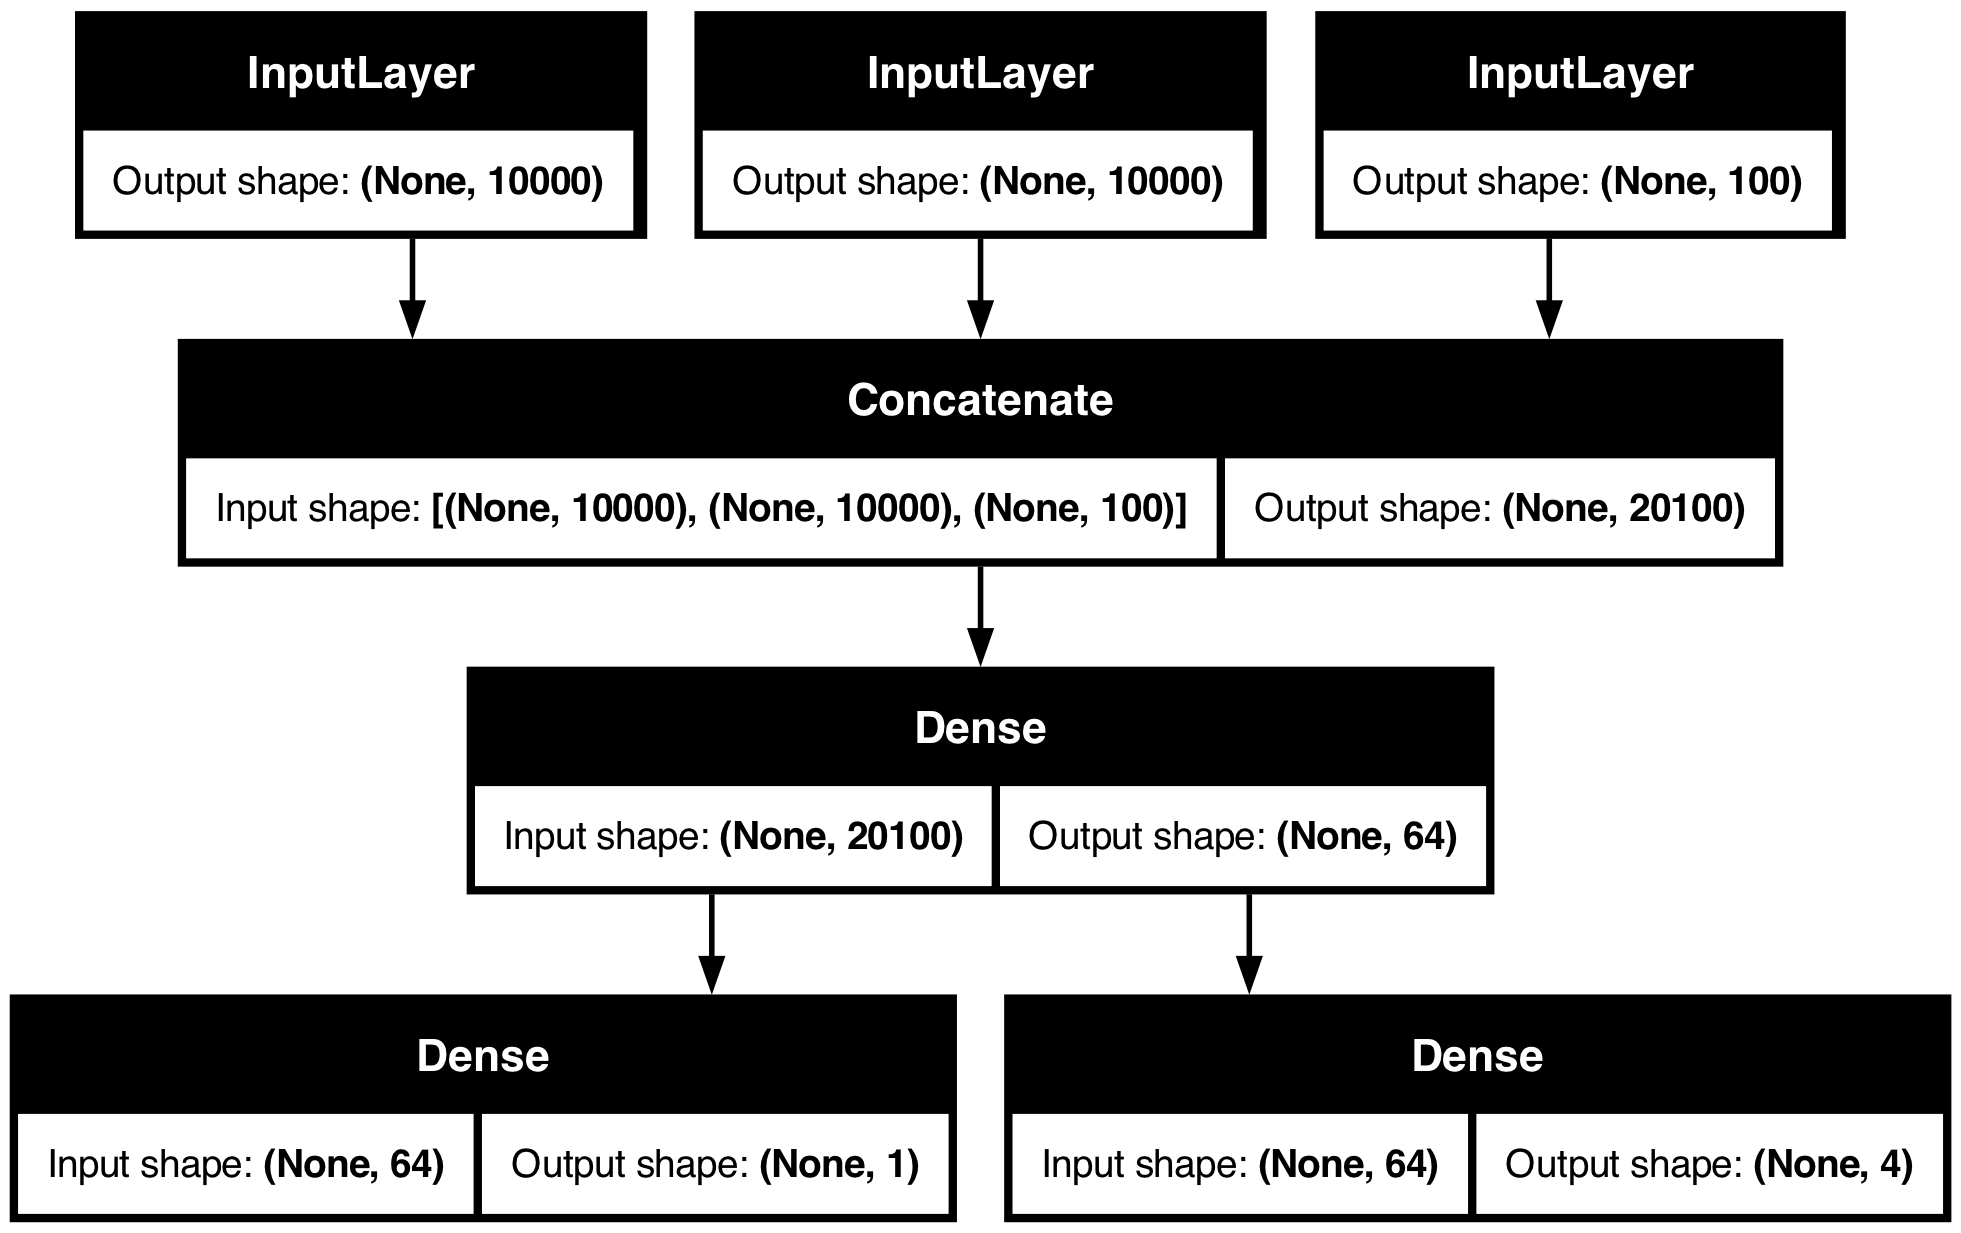

In [15]:
keras.utils.plot_model(model, "ticket_classification.png", show_shapes=True)

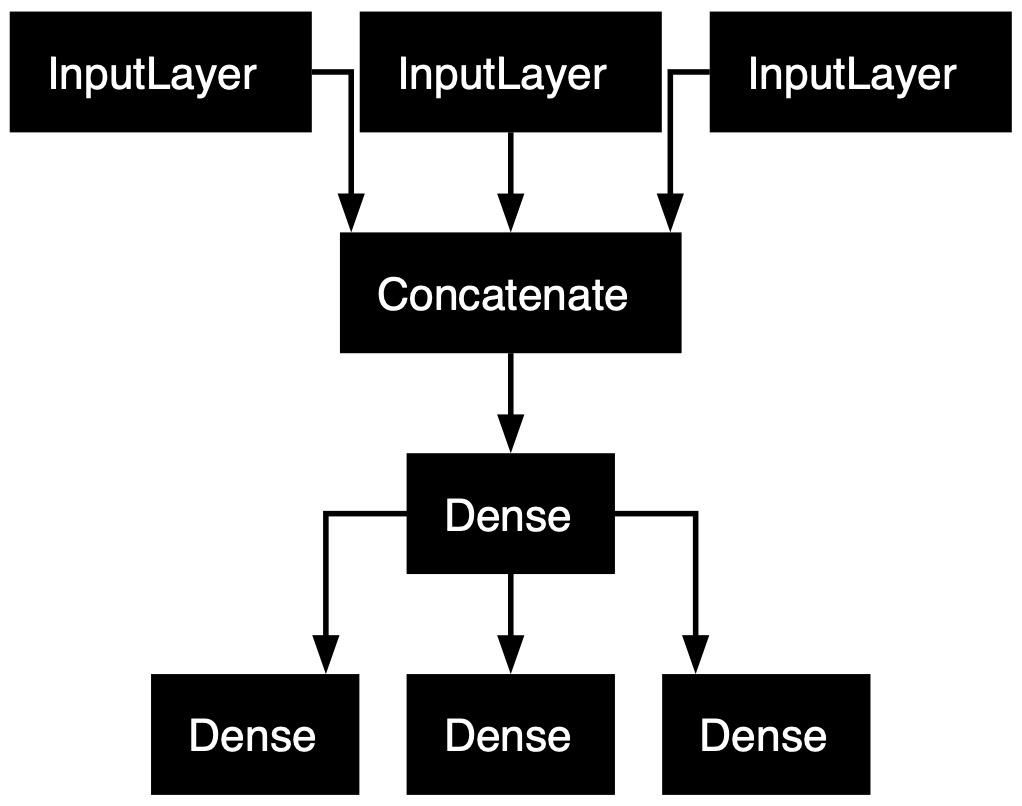

In [24]:
features = model.layers[4].output
difficulty = keras.layers.Dense(3, activation="softmax", name="difficulty")(features)
new_model = keras.Model(
    inputs=[title, text_body, tags], 
    outputs=[priority, dept, difficulty])
keras.utils.plot_model(new_model, "with_diff.jpg") 